In [3]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [4]:
import pandas as pd

# 1. 데이터 불러오기 (헤더가 두 줄인 경우)
file_path = '연도별 학업중단률.xlsx'
df = pd.read_excel(file_path, header=[0,1])
df

학년도   시도 학업 중단률(%)             \
                                             학년도   시도    고등교육기관  전문대학 교육대학   
0                                           2019   전체       6.8   8.1  1.5   
1                                           2020   전체       6.6   7.6  1.7   
2                                           2021   전체       6.8   8.1  2.4   
3                                           2022   전체       7.0   8.6  3.2   
4                                           2023   전체       7.2   9.0  4.2   
..                                           ...  ...       ...   ...  ...   
87                                          2021   제주       7.0   7.9    -   
88                                          2022   제주       6.9   7.4    -   
89                                          2023   제주       9.3  13.7    -   
90                                            주석  NaN       NaN   NaN  NaN   
91  출처: 한국교육개발원 교육통계서비스(https://kess.kedi.re.kr)  NaN       NaN   NaN  NaN   

                                ... 재적학생수                                   \
   일반대학 방송통신대학 산업대학  기술대학 각종학교  ...  기술대학    각종학교    원격대학     사이버대학   사내대학   
0   4.6   22.7  8.9   5.3  3.4  ...  76.0  3455.0  2382.0  125165.0  451.0   
1   4.6   23.1  9.7     0  2.5  ...  60.0  3431.0  2172.0  130311.0  414.0   
2   4.9   21.1  8.7     0  3.9  ...  62.0  3438.0  2486.0  142127.0  340.0   
3   5.2   20.8   10   4.3  3.4  ...  46.0  3426.0  2836.0  145934.0  334.0   
4   5.3     22  9.6  13.8  3.3  ...  29.0  3433.0  3267.0  145480.0  371.0   
..  ...    ...  ...   ...  ...  ...   ...     ...     ...       ...    ...   
87  6.2      -    -     -    -  ...   0.0     0.0     0.0       0.0    0.0   
88  6.3      -    -     -    -  ...   0.0     0.0     0.0       0.0    0.0   
89  6.1      -    -     -    -  ...   0.0     0.0     0.0       0.0    0.0   
90  NaN    NaN  NaN   NaN  NaN  ...   NaN     NaN     NaN       NaN    NaN   
91  NaN    NaN  NaN   NaN  NaN  ...   NaN     NaN     NaN       NaN    NaN   

                                                   
       전공대학     기능대학       대학원   대학원(석사)  대학원(박사)  
0   14245.0  26828.0  319240.0  243298.0  75942.0  
1   15267.0  26051.0  320595.0  241650.0  78945.0  
2   14821.0  23910.0  327415.0  245679.0  81736.0  
3   15036.0  21878.0  333907.0  248940.0  84967.0  
4   15160.0  19717.0  336596.0  250518.0  86078.0  
..      ...      ...       ...       ...      ...  
87      0.0     61.0    2451.0    1940.0    511.0  
88      0.0     64.0    2388.0    1894.0    494.0  
89      0.0     71.0    2354.0    1852.0    502.0  
90      NaN      NaN       NaN       NaN      NaN  
91      NaN      NaN       NaN       NaN      NaN  

[92 rows x 50 columns]

In [6]:
# 2. ‘전체’ 시도만 필터링
df_tot = df[df[('시도','시도')] == '전체']
df_tot.head()

학년도  시도 학업 중단률(%)                                        ... 재적학생수  \
    학년도  시도    고등교육기관 전문대학 교육대학 일반대학 방송통신대학 산업대학  기술대학 각종학교  ...  기술대학   
0  2019  전체       6.8  8.1  1.5  4.6   22.7  8.9   5.3  3.4  ...  76.0   
1  2020  전체       6.6  7.6  1.7  4.6   23.1  9.7     0  2.5  ...  60.0   
2  2021  전체       6.8  8.1  2.4  4.9   21.1  8.7     0  3.9  ...  62.0   
3  2022  전체       7.0  8.6  3.2  5.2   20.8   10   4.3  3.4  ...  46.0   
4  2023  전체       7.2  9.0  4.2  5.3     22  9.6  13.8  3.3  ...  29.0   

                                                                          \
     각종학교    원격대학     사이버대학   사내대학     전공대학     기능대학       대학원   대학원(석사)   
0  3455.0  2382.0  125165.0  451.0  14245.0  26828.0  319240.0  243298.0   
1  3431.0  2172.0  130311.0  414.0  15267.0  26051.0  320595.0  241650.0   
2  3438.0  2486.0  142127.0  340.0  14821.0  23910.0  327415.0  245679.0   
3  3426.0  2836.0  145934.0  334.0  15036.0  21878.0  333907.0  248940.0   
4  3433.0  3267.0  145480.0  371.0  15160.0  19717.0  336596.0  250518.0   

            
   대학원(박사)  
0  75942.0  
1  78945.0  
2  81736.0  
3  84967.0  
4  86078.0  

[5 rows x 50 columns]

In [7]:
# 3. 그래프 대상 교육기관 목록 (대학원 제외)
institutions = [
    '고등교육기관', '전문대학', '교육대학', '일반대학', '방송통신대학',
    '산업대학', '기술대학', '각종학교', '원격대학', '사이버대학',
    '사내대학', '전공대학', '기능대학'
]

# 4. 연도와 학업 중단률(%) 추출 및 숫자형 변환
years = df_tot[('학년도','학년도')].astype(str)
rates = df_tot['학업 중단률(%)'][institutions].apply(pd.to_numeric, errors='coerce')

years

0    2019
1    2020
2    2021
3    2022
4    2023
Name: (학년도, 학년도), dtype: object

In [8]:
rates

,고등교육기관,전문대학,교육대학,일반대학,방송통신대학,산업대학,기술대학,각종학교,원격대학,사이버대학,사내대학,전공대학,기능대학
0,6.8,8.1,1.5,4.6,22.7,8.9,5.3,3.4,20.5,16.9,10.2,8.4,9.0
1,6.6,7.6,1.7,4.6,23.1,9.7,0.0,2.5,16.5,15.7,1.4,8.0,9.2
2,6.8,8.1,2.4,4.9,21.1,8.7,0.0,3.9,22.3,15.6,2.9,7.6,9.5
3,7.0,8.6,3.2,5.2,20.8,10.0,4.3,3.4,24.7,14.5,0.9,8.8,11.1
4,7.2,9.0,4.2,5.3,22.0,9.6,13.8,3.3,25.1,15.6,1.1,10.6,12.1


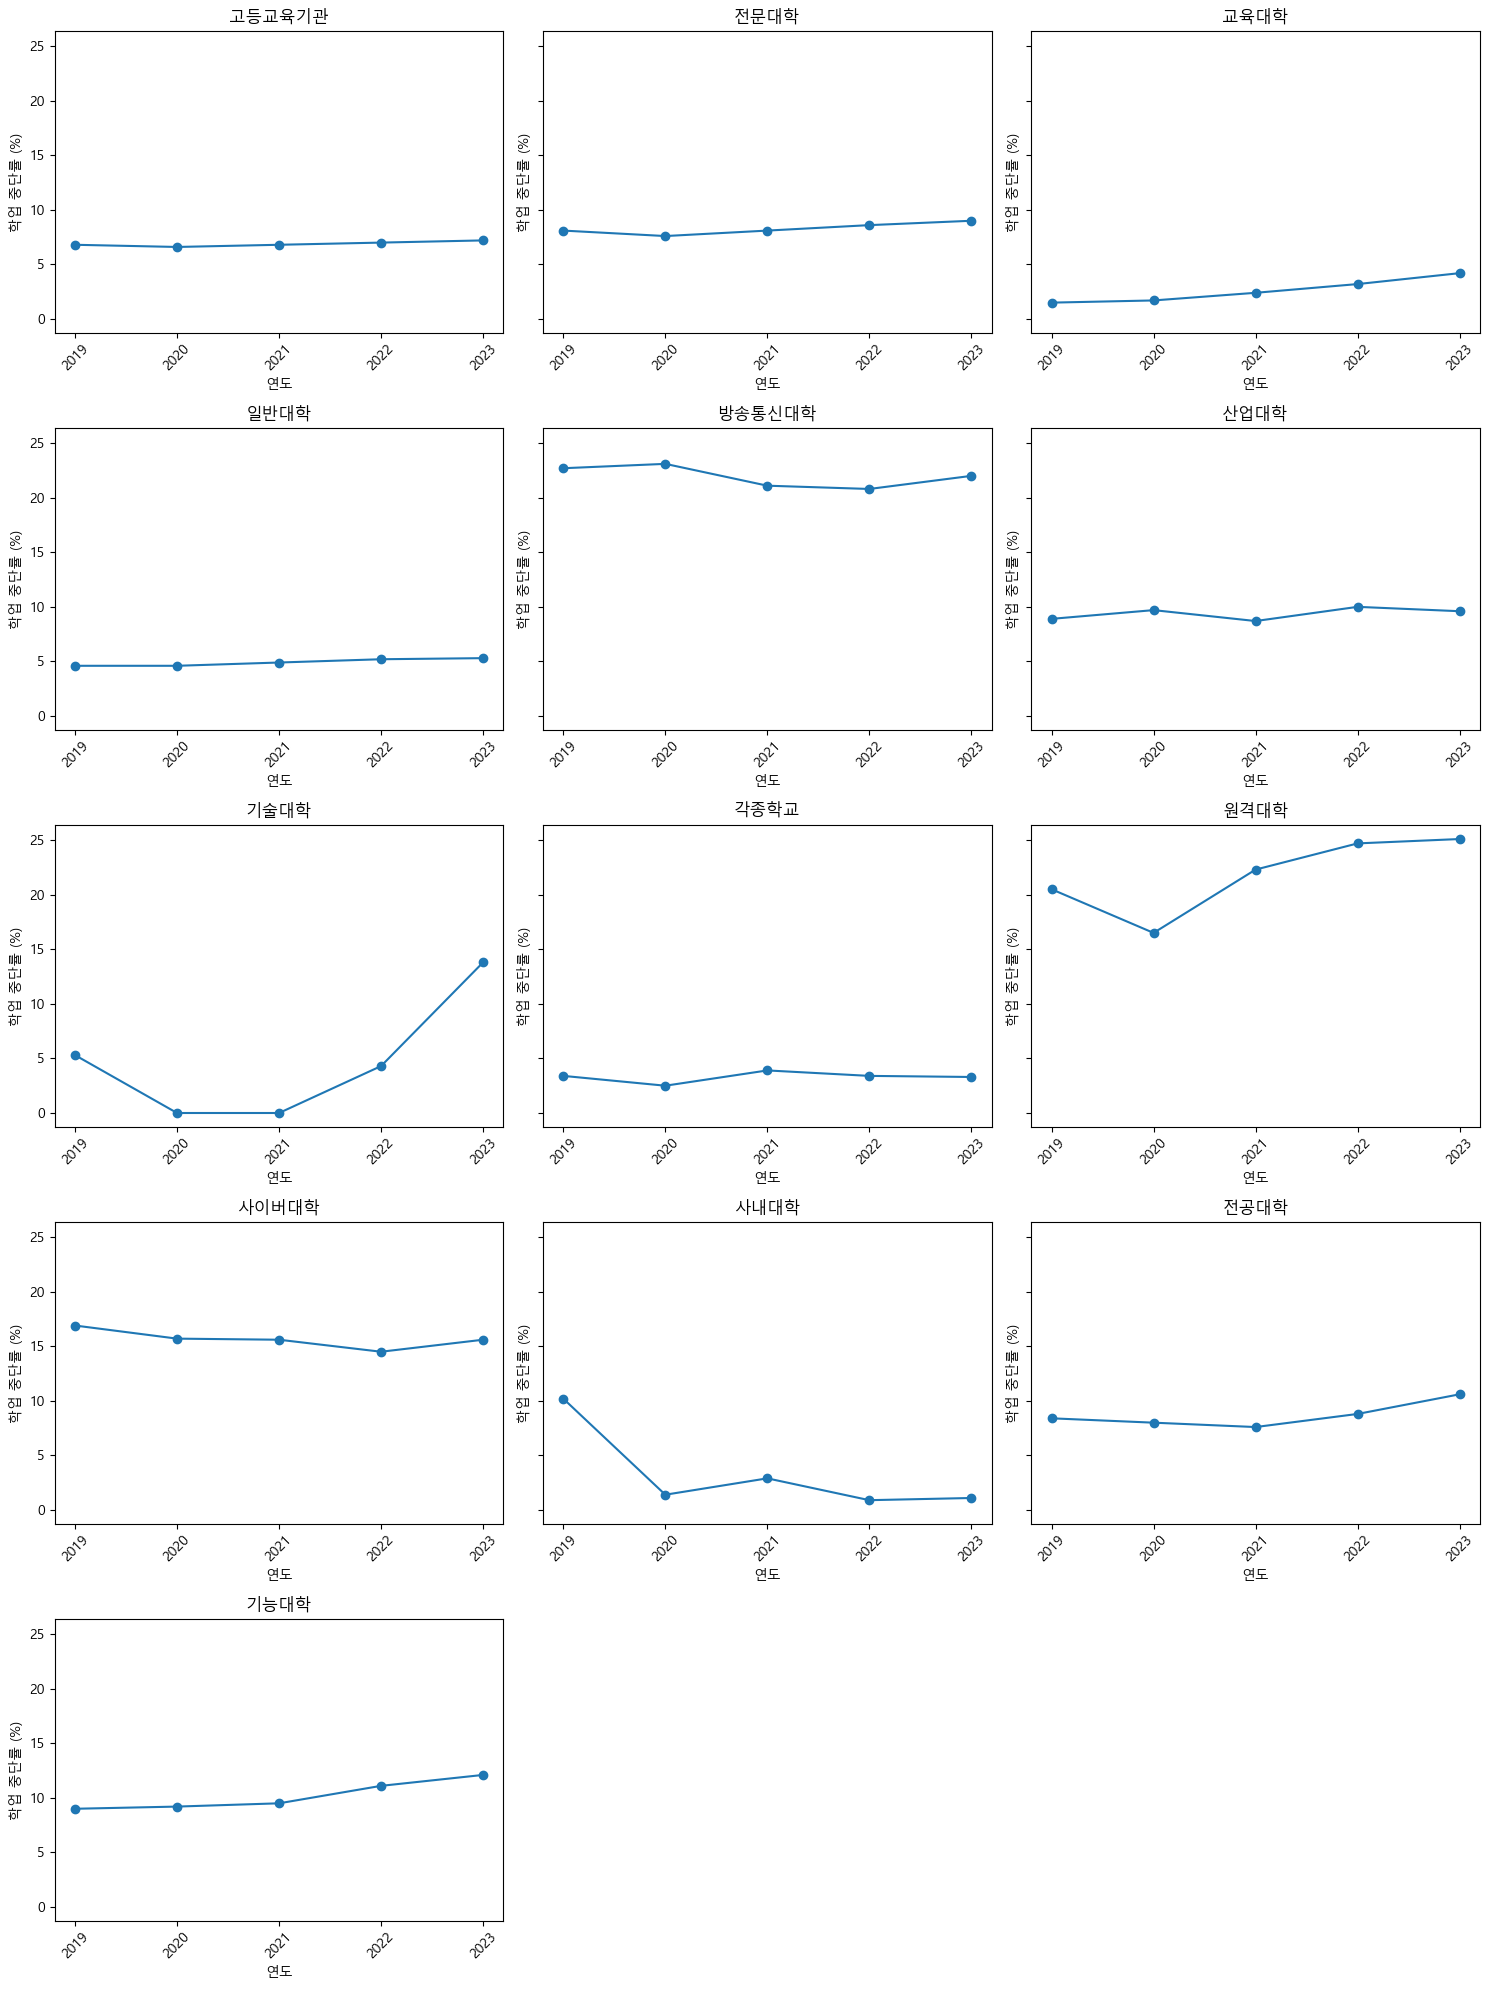

In [9]:
# 5. 작은 다중 그래프(Subplots) 설정
n = len(institutions)
cols = 3                           # 한 행에 3개 그래프
rows = (n + cols - 1) // cols      # 필요한 행 개수 계산

fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4), sharey=True)

# 6. 각 기관별 꺾은선 그래프 그리기
for ax, inst in zip(axes.flatten(), institutions):
    ax.plot(years, rates[inst], marker='o')
    ax.set_title(inst, fontsize=12)
    ax.set_xlabel('연도')
    ax.set_ylabel('학업 중단률 (%)')
    ax.tick_params(axis='x', rotation=45)

# 7. 남는 빈 서브플롯 제거
for ax in axes.flatten()[n:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

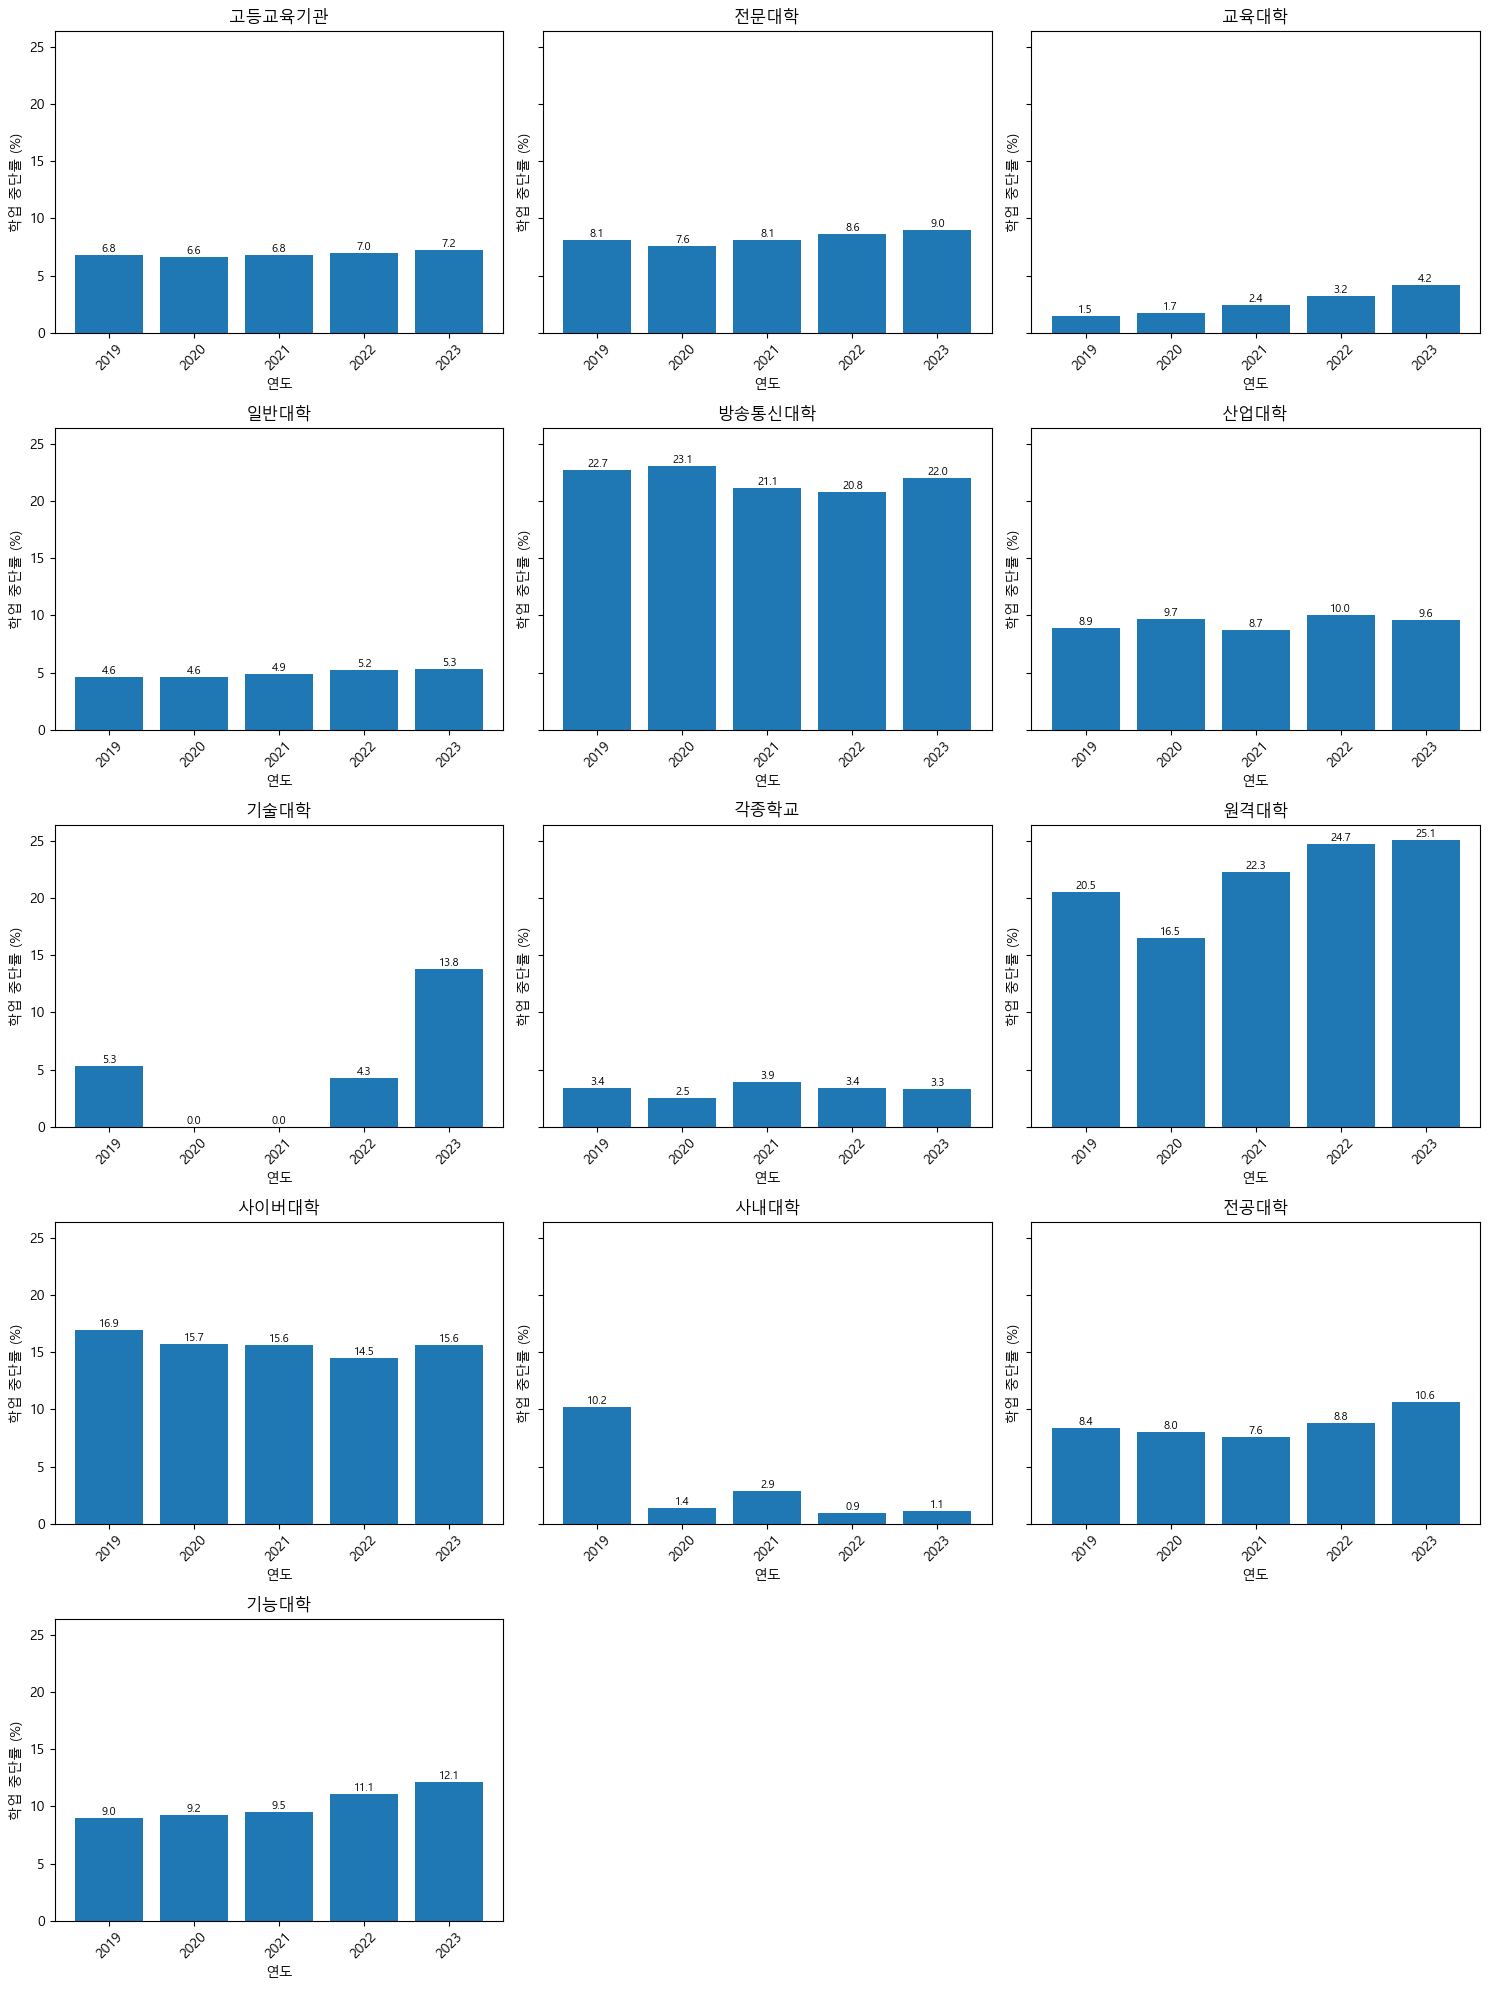

In [10]:
# 5. 작은 다중 막대그래프 설정
cols = 3
rows = (len(institutions) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), sharey=True)

for ax, inst in zip(axes.flatten(), institutions):
    values = rates[inst]
    ax.bar(years, values)
    ax.set_title(inst, fontsize=12)
    ax.set_xlabel('연도')
    ax.set_ylabel('학업 중단률 (%)')
    ax.tick_params(axis='x', rotation=45)
    # 각 막대 위에 y값 주석
    for x, y in zip(years, values):
        if not pd.isna(y):
            ax.text(x, y, f'{y:.1f}', ha='center', va='bottom', fontsize=8)

# 빈 서브플롯 제거
for ax in axes.flatten()[len(institutions):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

---

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (학년도, 학년도)            92 non-null     object 
 1   (시도, 시도)              90 non-null     object 
 2   (학업 중단률(%), 고등교육기관)   90 non-null     float64
 3   (학업 중단률(%), 전문대학)     90 non-null     float64
 4   (학업 중단률(%), 교육대학)     90 non-null     object 
 5   (학업 중단률(%), 일반대학)     90 non-null     float64
 6   (학업 중단률(%), 방송통신대학)   90 non-null     object 
 7   (학업 중단률(%), 산업대학)     90 non-null     object 
 8   (학업 중단률(%), 기술대학)     90 non-null     object 
 9   (학업 중단률(%), 각종학교)     90 non-null     object 
 10  (학업 중단률(%), 원격대학)     90 non-null     object 
 11  (학업 중단률(%), 사이버대학)    90 non-null     object 
 12  (학업 중단률(%), 사내대학)     90 non-null     object 
 13  (학업 중단률(%), 전공대학)     90 non-null     object 
 14  (학업 중단률(%), 기능대학)     90 non-null     object 
 15  (학업 중단률(%), 대학원)      90 

In [12]:
df.describe()

학업 중단률(%)                                                         \
          고등교육기관       전문대학       일반대학        대학원    대학원(석사)    대학원(박사)   
count  90.000000  90.000000  90.000000  90.000000  90.000000  90.000000   
mean    6.507778   8.463333   5.372222   5.655556   5.728889   5.645556   
std     1.081014   1.873736   1.172343   0.912351   0.902462   1.301353   
min     4.600000   4.800000   3.000000   3.300000   3.200000   2.800000   
25%     5.725000   7.400000   4.600000   5.225000   5.300000   4.900000   
50%     6.350000   8.300000   5.350000   5.700000   5.750000   5.600000   
75%     7.000000   9.100000   6.000000   6.200000   6.200000   6.400000   
max     9.500000  17.700000   9.100000   8.300000   8.600000  10.200000   

               학업중단자                                          ...      재적학생수  \
              고등교육기관          전문대학        교육대학          일반대학  ...       기술대학   
count      90.000000     90.000000   90.000000     90.000000  ...  90.000000   
mean    24420.177778   5303.688889   43.866667  10575.400000  ...   6.066667   
std     50590.038404  10756.577269   94.813383  21028.045087  ...  18.064056   
min      1241.000000    228.000000    0.000000    797.000000  ...   0.000000   
25%      6381.250000   1483.500000    0.000000   2636.250000  ...   0.000000   
50%      7793.500000   1906.500000   23.500000   4976.500000  ...   0.000000   
75%     14270.000000   3708.500000   42.750000   9039.000000  ...   0.000000   
max    226931.000000  52428.000000  621.000000  98351.000000  ...  76.000000   

                                                                          \
              각종학교         원격대학          사이버대학        사내대학          전공대학   
count    90.000000    90.000000      90.000000   90.000000     90.000000   
mean    381.844444   292.066667   15311.488889   42.444444   1656.200000   
std    1055.042157   725.524170   38236.332891   92.858248   4712.248732   
min       0.000000     0.000000       0.000000    0.000000      0.000000   
25%       0.000000     0.000000       0.000000    0.000000      0.000000   
50%       0.000000     0.000000    1243.000000    0.000000      0.000000   
75%       0.000000     0.000000    4484.250000   40.000000      0.000000   
max    3455.000000  3267.000000  145934.000000  451.000000  15267.000000   

                                                                 
               기능대학            대학원        대학원(석사)       대학원(박사)  
count     90.000000      90.000000      90.000000     90.000000  
mean    2630.755556   36394.511111   27335.222222   9059.288889  
std     5256.365276   77839.213504   58711.613111  19181.342277  
min        0.000000    1752.000000    1442.000000    310.000000  
25%      851.000000    7266.250000    5810.750000   1614.250000  
50%     1232.500000   11527.500000    8393.000000   2651.500000  
75%     2389.000000   19498.750000   12280.500000   4182.750000  
max    26828.000000  336596.000000  250518.000000  86078.000000  

[8 rows x 38 columns]

In [13]:
df['학업 중단률(%)'].value_counts(normalize=True, sort=False, dropna=False)

고등교육기관  전문대학  교육대학  일반대학  방송통신대학  산업대학  기술대학  각종학교  원격대학  사이버대학  사내대학  전공대학  기능대학  대학원  대학원(석사)  대학원(박사)
4.6     5.2   -     4.2   -       -     -     -     -     -      3     -     9.7   3.9  3.9      3.8        0.010870
        7.0   1.3   3.0   -       -     -     -     -     -      -     -     9.1   5.4  5.0      6.7        0.010870
4.8     4.8   -     4.5   -       -     -     -     -     -      20.7  -     9     4.3  4.7      3.9        0.010870
        5.2   -     4.3   -       -     -     -     -     -      -     -     12.6  3.6  4.1      3.1        0.010870
        6.5   2.3   3.5   -       -     -     -     -     -      -     -     10    5.9  5.7      6.5        0.010870
                                                                                                              ...   
8.8     12.4  -     6.9   -       -     -     -     -     -      3.7   -     16.3  7.5  7.9      6.4        0.010870
9.3     10.2  -     9.1   -       -     -     -     -     -      0     -    

In [14]:
df.isnull().sum()

학년도        학년도        0
시도         시도         2
학업 중단률(%)  고등교육기관     2
           전문대학       2
           교육대학       2
           일반대학       2
           방송통신대학     2
           산업대학       2
           기술대학       2
           각종학교       2
           원격대학       2
           사이버대학      2
           사내대학       2
           전공대학       2
           기능대학       2
           대학원        2
           대학원(석사)    2
           대학원(박사)    2
학업중단자      고등교육기관     2
           전문대학       2
           교육대학       2
           일반대학       2
           방송통신대학     2
           산업대학       2
           기술대학       2
           각종학교       2
           원격대학       2
           사이버대학      2
           사내대학       2
           전공대학       2
           기능대학       2
           대학원        2
           대학원(석사)    2
           대학원(박사)    2
재적학생수      고등교육기관     2
           전문대학       2
           교육대학       2
           일반대학       2
           방송통신대학     2
           산업대학       2
           기술대학       2
           각종학교 

In [15]:
df.select_dtypes(include=['object']).nunique()

학년도        학년도        7
시도         시도        18
학업 중단률(%)  교육대학      38
           방송통신대학     6
           산업대학      16
           기술대학       5
           각종학교      13
           원격대학      16
           사이버대학     40
           사내대학      18
           전공대학       6
           기능대학      60
dtype: int64